# Crawl Top 100 Movies

## Install Dependencies

It is recommended to run this jupyter notebook in virtual environment to avoid dependency issues

In [1]:
!pip install scrapy

## Run Crawler

The confiuration file is `maoyan/settings.py`

To avoid captcha, the request concurrency is limited to 1, and a 3 seconds delay is added after each request

HTTP cache is set to 30 days for testing

Without cache, the crawling can take up minutes

In [2]:
!scrapy crawl --loglevel=INFO -O top100.csv top_100

2021-11-04 09:29:33 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: maoyan)
2021-11-04 09:29:33 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.9.7 (default, Aug 31 2021, 13:28:12) - [GCC 11.1.0], pyOpenSSL 21.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 35.0.0, Platform Linux-5.14.10-1-MANJARO-x86_64-with-glibc2.33
2021-11-04 09:29:33 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'maoyan',
 'CONCURRENT_REQUESTS': 1,
 'DOWNLOAD_DELAY': 3,
 'EDITOR': 'nano',
 'HTTPCACHE_ENABLED': True,
 'HTTPCACHE_EXPIRATION_SECS': 2592000,
 'LOG_LEVEL': 'INFO',
 'NEWSPIDER_MODULE': 'maoyan.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['maoyan.spiders'],
 'USER_AGENT': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, '
               'like Gecko) Chrome/95.0.4638.69 Safari/537.36'}
2021-11-04 09:29:33 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.Core

# Data Analysis

## Install Dependencies

In [3]:
!pip install pandas seaborn

## Read the CSV file

In [4]:
import pandas as pd

# read csv file
top_100 = pd.read_csv('top100.csv', dtype={
    'box_first_week': 'Int64',
    'box_sum': 'Int64',
    'celebrity': 'object',
    'date': 'str',
    'honor_count': 'Int64',
    'length': 'Int64',
    'name_alt': 'str',
    'name_cn': 'str',
    'nomination_count': 'Int64',
    'poster': 'str',
    'rank': 'Int64',
    'region': 'object',
    'score': 'float',
    'tag': 'object',
    'url': 'str',
}, parse_dates=[
    'date'
])

# cast data type
top_100['celebrity'] = top_100['celebrity'].apply(eval) # to dict
top_100['region'] = top_100['region'].apply(lambda s: s.split(',')) # to list
top_100['tag'] = top_100['tag'].apply(lambda s: s.split(',')) # to list

#for i, l in enumerate(top_100['tag']):
#    print(type(l))
# pd.Series([x for _list in top_100['tag'] for x in _list]).value_counts()

# show result
top_100

,box_first_week,box_sum,celebrity,date,honor_count,length,name_alt,name_cn,nomination_count,poster,rank,region,score,tag,url
0,<NA>,<NA>,"{'导演': ['罗伯·莱纳'], '演员': ['玛德琳·卡罗尔', '卡兰·麦克奥利菲'...",2010-07-26,<NA>,90,Flipped,怦然心动,<NA>,https://p0.meituan.net/movie/15f1ac49b6d1ff7b7...,10,[美国],8.9,[爱情],https://maoyan.com/films/46818
1,<NA>,<NA>,"{'导演': ['吕克·贝松'], '演员': ['让·雷诺', '加里·奥德曼', '娜塔...",1994-09-14,0,110,Léon,这个杀手不太冷,9,https://p1.meituan.net/movie/6bea9af4524dfbd0b...,9,[法国],9.4,"[剧情, 动作, 犯罪]",https://maoyan.com/films/4055
2,2380,5979,"{'导演': ['罗伯托·贝尼尼'], '演员': ['罗伯托·贝尼尼', '朱斯蒂诺·杜拉...",2020-01-03,24,116,La vita è bella,美丽人生,16,https://p1.meituan.net/movie/580d81a2c78bf204f...,8,[意大利],9.3,"[战争, 剧情, 爱情]",https://maoyan.com/films/1303
3,4840,9675,"{'导演': ['是枝裕和'], '演员': ['中川雅也', '安藤樱', '松冈茉优',...",2018-08-03,19,121,万引き家族,小偷家族,32,https://p1.meituan.net/movie/ac8f0004928fbce5a...,7,[日本],8.1,"[剧情, 犯罪]",https://maoyan.com/films/1216365
4,<NA>,5,"{'导演': ['陈凯歌'], '演员': ['张国荣', '张丰毅', '巩俐', '吕齐...",1993-07-26,5,171,Farewell My Concubine,霸王别姬,3,https://p0.meituan.net/movie/61fea77024f83b370...,6,"[中国大陆, 中国香港]",9.4,"[剧情, 爱情]",https://maoyan.com/films/1203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,<NA>,<NA>,"{'导演': ['拉斯·霍尔斯道姆'], '演员': ['Forest', '理查·基尔',...",2009-06-13,<NA>,93,Hachi: A Dog's Tale,忠犬八公的故事,<NA>,https://p1.meituan.net/movie/8236183afcf1bd0ff...,24,"[美国, 英国]",9.3,[剧情],https://maoyan.com/films/38286
96,<NA>,<NA>,"{'导演': ['托德·菲利普斯'], '演员': ['华金·菲尼克斯', '罗伯特·德尼罗...",2019-10-04,17,122,Joker,小丑,47,https://p0.meituan.net/moviemachine/7707dc3478...,23,[美国],8.6,"[剧情, 惊悚, 犯罪]",https://maoyan.com/films/1215201
97,10263,57288,"{'导演': ['李安'], '演员': ['苏拉·沙玛', '伊尔凡·可汗', '塔布',...",2012-11-22,26,127,Life of Pi,少年派的奇幻漂流,52,https://p0.meituan.net/movie/cac99bd00d40586dc...,22,"[美国, 中国台湾, 英国, 加拿大]",9.0,"[剧情, 奇幻, 冒险]",https://maoyan.com/films/995
98,17036,37684,"{'导演': ['娜丁·拉巴基'], '演员': ['赞恩·阿尔·拉菲亚', '约丹诺斯·希...",2019-04-29,2,116,كفرناحوم,何以为家,13,https://p1.meituan.net/movie/d28b729ffe72353a7...,21,[黎巴嫩],9.3,[剧情],https://maoyan.com/films/1218727


## Draw Plots

Import the seaborn library

In [5]:
import seaborn as sns
import matplotlib as plt

# Fix zh_CN font
# Make sure you have SimHei font installed in your system. 
# If not, install the font, clear the cache in ~/.cache/matplotlib, then restart jupyter
sns.set(style="darkgrid", font="SimHei", rc = {'figure.figsize':(8,6)})
plt.rcParams['axes.unicode_minus']=False

### User rating distribution

<AxesSubplot:xlabel='score', ylabel='Count'>

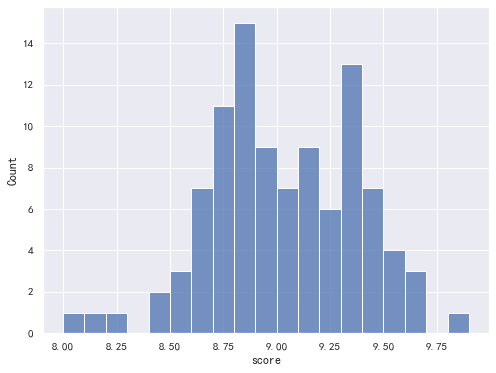

In [6]:
sns.histplot(top_100, x='score', binwidth=0.1)

### Date distibution

<AxesSubplot:xlabel='date', ylabel='Count'>

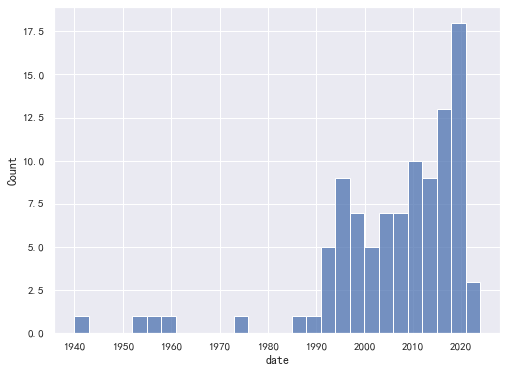

In [7]:
sns.histplot(top_100, x='date', binwidth=365*3)

### Length distribution

<AxesSubplot:xlabel='length', ylabel='Count'>

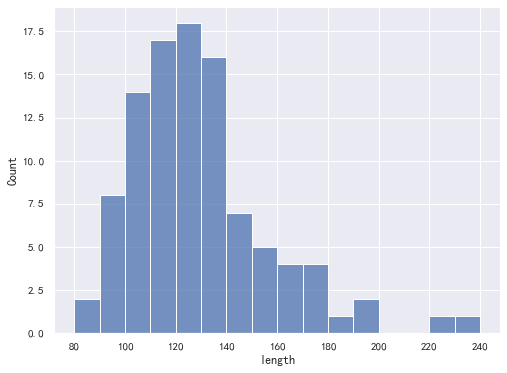

In [8]:
sns.histplot(top_100, x='length', binwidth=10)

### Scatterplot

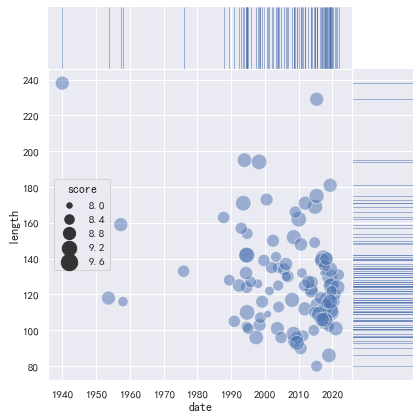

In [9]:
#sns.relplot(data=top_100, x='date', y='length', size='score', sizes=(40,400), alpha=.5)

g = sns.JointGrid(data=top_100, x='date', y='length', space=0)
g.plot_joint(sns.scatterplot, size=top_100['score'], sizes=(30,300), alpha=.5)
g.plot_marginals(sns.rugplot, height=1, alpha=.5)

### Tag count

[Text(0, 0.5, ''), Text(0.5, 0, 'tag count')]

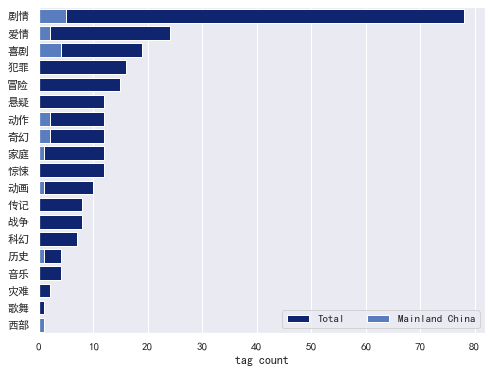

In [10]:
# expand tag list and check if mainland
df_tag_mainland = pd.DataFrame([[tag, '中国大陆' in row['region']] for i, row in top_100.iterrows() for tag in row['tag']], columns=['tag', 'mainland'])

# group by tag name and sum
df_tag_mainland['total'] = 1
df_sum_tag_mainland = df_tag_mainland.groupby('tag').agg({'total': 'sum', 'mainland': 'sum'}).reset_index().sort_values('total', ascending=False)

f, ax = plt.pyplot.subplots()
# Plot the total
sns.set_color_codes('dark')
sns.barplot(x="total", y='tag', data=df_sum_tag_mainland, label='Total', color='b')
# Plot the mainland
sns.set_color_codes('muted')
sns.barplot(x="mainland", y='tag', data=df_sum_tag_mainland, label='Mainland China', color='b')
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="tag count")

### Tag correlation

<AxesSubplot:>

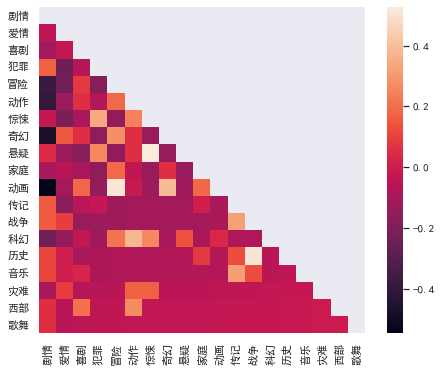

In [11]:
import numpy as np

df_flat_tag = pd.Series([x for _list in top_100['tag'] for x in _list])

# list to bool matrix
def boolean_df(item_lists, unique_items):
    bool_dict = {}
    for i, item in enumerate(unique_items):
        bool_dict[item] = item_lists.apply(lambda x: item in x)
    return pd.DataFrame(bool_dict)

tag_corr = boolean_df(top_100['tag'], df_flat_tag.value_counts().index).corr()
mask = np.triu(np.ones_like(tag_corr, dtype=bool))
sns.heatmap(tag_corr, mask=mask, square=True)

### Region count

<AxesSubplot:xlabel='count'>

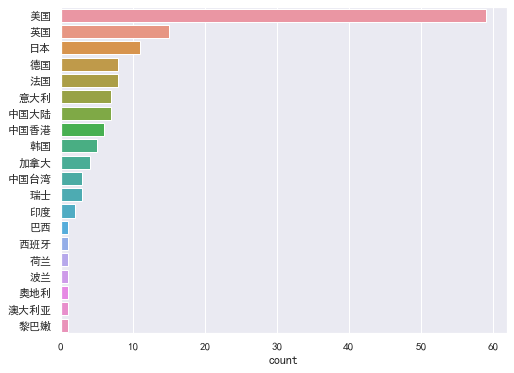

In [12]:
df_flat_region = pd.Series([x for _list in top_100['region'] for x in _list])
sns.countplot(y=df_flat_region, order=df_flat_region.value_counts().index)

### Region correlation

<AxesSubplot:>

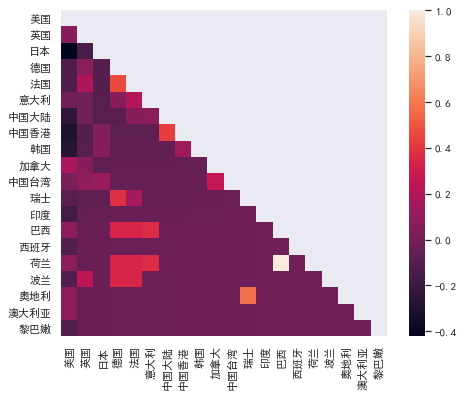

In [13]:
import numpy as np

df_flat_region = pd.Series([x for _list in top_100['region'] for x in _list])

# list to bool matrix
def boolean_df(item_lists, unique_items):
    bool_dict = {}
    for i, item in enumerate(unique_items):
        bool_dict[item] = item_lists.apply(lambda x: item in x)
    return pd.DataFrame(bool_dict)

region_corr = boolean_df(top_100['region'], df_flat_region.value_counts().index).corr()
mask = np.triu(np.ones_like(region_corr, dtype=bool))
sns.heatmap(region_corr, mask=mask, square=True)

### Top 20 director/actor/writer

<AxesSubplot:xlabel='count'>

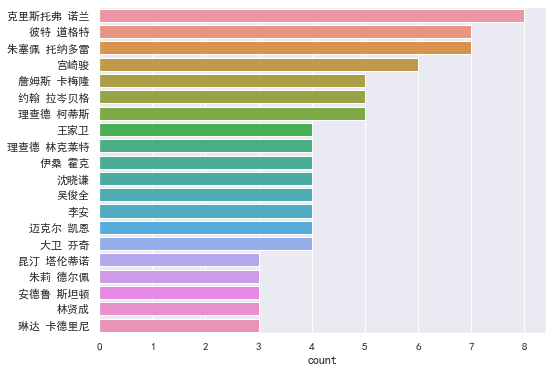

In [14]:
from itertools import chain

# expand and flatten the celebrity(director, actor, writer) list
celebrity = pd.Series(list(chain.from_iterable([[s.replace('·', ' ') for s in cele_list] for i, row in top_100.iterrows() for cele_type, cele_list in row['celebrity'].items() if cele_type in ['导演','演员', '编剧']])))

sns.countplot(y=celebrity, order=celebrity.value_counts()[:20].index)

### Top 20 celebrity

<AxesSubplot:xlabel='count'>

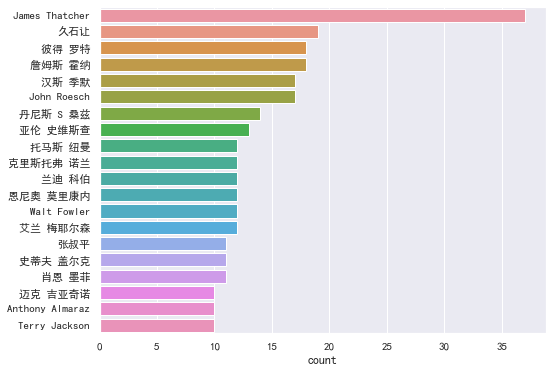

In [15]:
from itertools import chain

# expand and flatten the celebrity(director, actor, writer) list
celebrity = pd.Series(list(chain.from_iterable([[s.replace('·', ' ') for s in cele_list] for i, row in top_100.iterrows() for cele_type, cele_list in row['celebrity'].items()])))

sns.countplot(y=celebrity, order=celebrity.value_counts()[:20].index)